For this project, I need to create a binary classifier that determines whether or not a car is efficient.

Here I imported all of the necessary packages for the whole project.

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Here I read in and stored the dataset into a data frame called cars.

In [2]:
cars = pd.read_csv('cars.csv')

Looking at the dataset at first glance.

In [3]:
cars

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


Here we are looking at what kind of datas we are gonna be dealing with and how many of them are there.

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Dimensions.Height                                5076 non-null   int64 
 1   Dimensions.Length                                5076 non-null   int64 
 2   Dimensions.Width                                 5076 non-null   int64 
 3   Engine Information.Driveline                     5076 non-null   object
 4   Engine Information.Engine Type                   5076 non-null   object
 5   Engine Information.Hybrid                        5076 non-null   bool  
 6   Engine Information.Number of Forward Gears       5076 non-null   int64 
 7   Engine Information.Transmission                  5076 non-null   object
 8   Fuel Information.City mpg                        5076 non-null   int64 
 9   Fuel Information.Fuel Type               

Print to see if there are any null values in the data.

In [5]:
print("Presence of null values: " + str(cars.isnull().values.any()))

Presence of null values: False


Original descriptive statistics.

In [6]:
cars.describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


Here I made a new column called average mpg. These numbers are the mean of city and highway mpg. This number helps us better understand the average mpg of a car as we are uncertain if you were to drive in the city or the highway more.

In [7]:
cars['Average mpg'] = cars[['Fuel Information.City mpg', 'Fuel Information.Highway mpg']].mean(axis=1)
cars

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,Average mpg
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236,21.5
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207,25.0
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207,25.5
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207,24.5
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253,21.5
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398,16.0
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398,16.0
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330,21.0


Descriptive statistics with the addition of average mpg.

In [8]:
cars.describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,Average mpg
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250,20.700650
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328,5.302846
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000,9.500000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000,17.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000,20.500000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000,24.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000,121.500000


Here I set up a heatmap to visually show the correlation of each column among each other. 

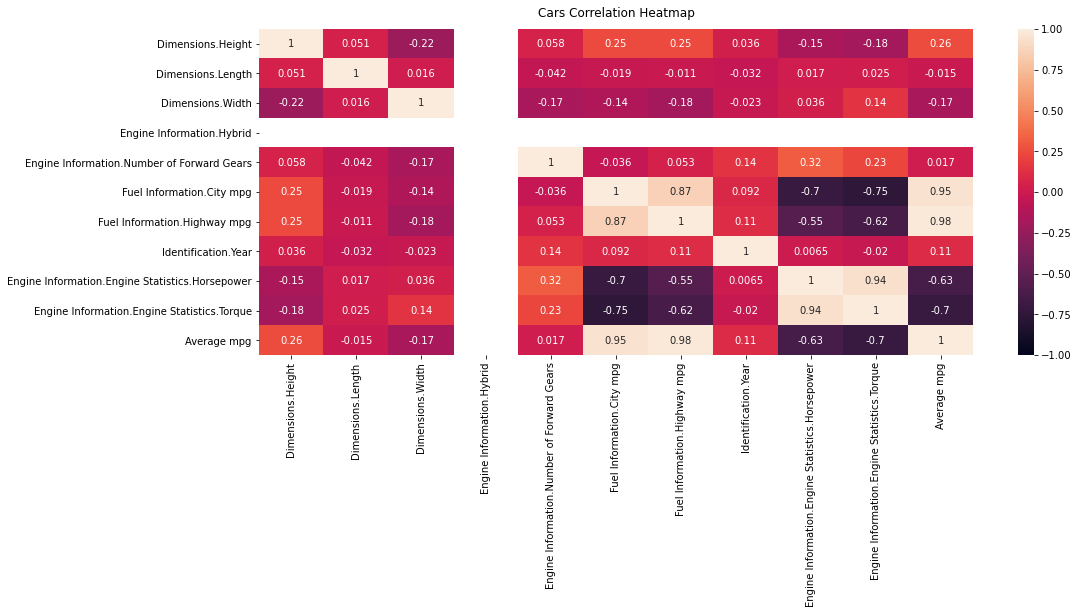

In [9]:
# Size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(cars.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Cars Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Looking at each and every column on a histogram to better understand infomation visually. 

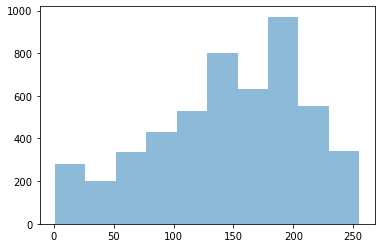

In [10]:
plt.hist(cars['Dimensions.Height'],alpha=0.5);

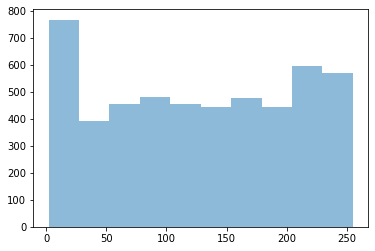

In [11]:
plt.hist(cars['Dimensions.Length'],alpha=0.5);

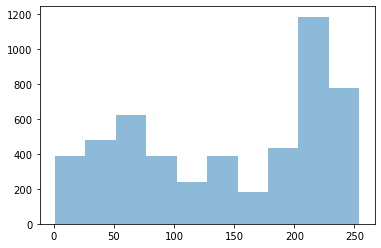

In [12]:
plt.hist(cars['Dimensions.Width'],alpha=0.5);

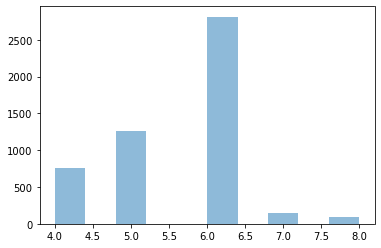

In [13]:
plt.hist(cars['Engine Information.Number of Forward Gears'],alpha=0.5);

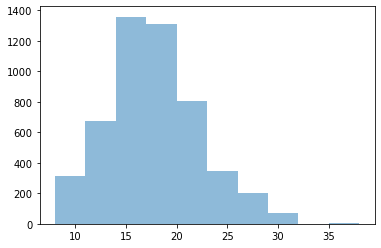

In [14]:
plt.hist(cars['Fuel Information.City mpg'],alpha=0.5);

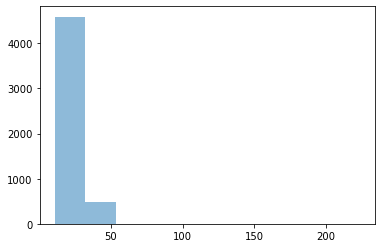

In [15]:
plt.hist(cars['Fuel Information.Highway mpg'],alpha=0.5);

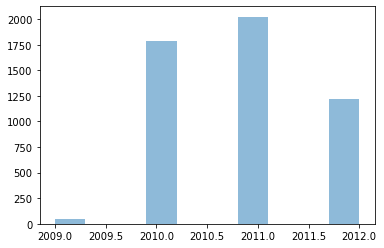

In [16]:
plt.hist(cars['Identification.Year'],alpha=0.5);

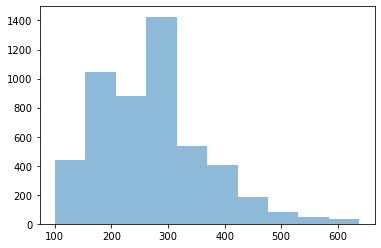

In [17]:
plt.hist(cars['Engine Information.Engine Statistics.Horsepower'],alpha=0.5);

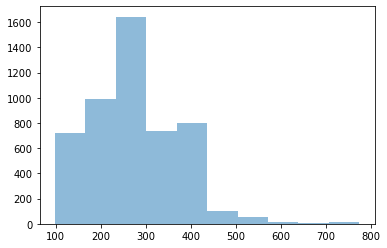

In [18]:
plt.hist(cars['Engine Information.Engine Statistics.Torque'],alpha=0.5);

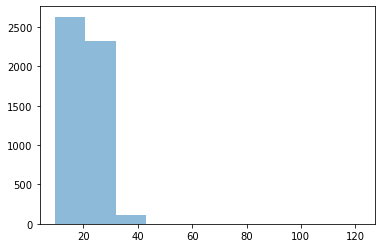

In [19]:
plt.hist(cars['Average mpg'],alpha=0.5);

Here I look at the counts of average mpg and found that most cars are around 20 - 21.5 mpg range. 

In [20]:
cars['Average mpg'].value_counts()

21.5     303
20.0     281
21.0     241
17.0     225
18.0     221
22.5     185
23.0     178
19.5     178
19.0     178
24.5     172
15.5     160
16.0     155
16.5     155
22.0     149
20.5     144
15.0     133
18.5     122
17.5     119
24.0     110
14.5     102
25.5     101
27.0     100
23.5      94
25.0      93
13.5      92
26.0      87
30.0      82
11.0      73
26.5      71
27.5      69
12.0      64
11.5      54
28.0      54
29.5      53
31.0      48
13.0      44
28.5      41
14.0      41
10.5      38
29.0      37
12.5      34
30.5      33
31.5      28
32.0      27
32.5      18
10.0      16
33.5      15
35.0      13
34.5      12
34.0       9
36.0       7
33.0       5
35.5       4
9.5        3
37.5       2
38.0       1
121.5      1
37.0       1
Name: Average mpg, dtype: int64

Here I made the efficiency column, in which everything with a one is deemed efficient.

In [21]:
# creating a blank series
Efficient = pd.Series([])

# running a for loop and assigning some values to series
for i in range(len(cars)):
    if cars["Average mpg"][i] >= 25:
        Efficient[i]= 1
 
    else:
        Efficient[i]= 0
 
         
# inserting new column with values of list made above       
cars.insert(2, "Efficient", Efficient)
 
# list output
cars.head()

<ipython-input-21-5fecc8293a1c>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Efficient = pd.Series([])


,Dimensions.Height,Dimensions.Length,Efficient,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,Average mpg
0,140,143,0,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236,21.5
1,140,143,1,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207,25.0
2,140,143,1,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207,25.5
3,140,143,0,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207,24.5
4,140,143,0,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207,24.5


Here are the value count results of what I deemed as efficient.

In [22]:
cars['Efficient'].value_counts()

0    4064
1    1012
Name: Efficient, dtype: int64

Here you can visually see that only about a fifth of the cars is deemed efficient by my standers. These cars all have an mpg of above 25.

<AxesSubplot:>

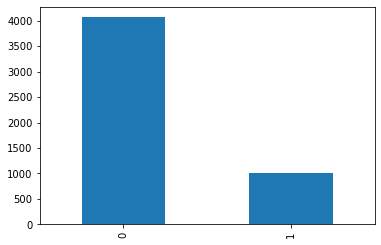

In [23]:
pd.value_counts(cars['Efficient']).plot.bar()

In [24]:
X = cars.drop('Efficient', axis = 1) #Feature
y = cars.Efficient #Target

In [25]:
X_t, X_test, y_t, y_test = train_test_split(X, y, random_state=2021)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, random_state=2021)

In [26]:
num_cols = list(X.select_dtypes('number').columns)
num_cols

['Dimensions.Height',
 'Dimensions.Length',
 'Dimensions.Width',
 'Engine Information.Number of Forward Gears',
 'Fuel Information.City mpg',
 'Fuel Information.Highway mpg',
 'Identification.Year',
 'Engine Information.Engine Statistics.Horsepower',
 'Engine Information.Engine Statistics.Torque',
 'Average mpg']

In [27]:
cat_cols = list(X.select_dtypes('object').columns)
cat_cols

['Engine Information.Driveline',
 'Engine Information.Engine Type',
 'Engine Information.Transmission',
 'Fuel Information.Fuel Type',
 'Identification.Classification',
 'Identification.ID',
 'Identification.Make',
 'Identification.Model Year']

In [28]:
X_train.isna().sum()

Dimensions.Height                                  0
Dimensions.Length                                  0
Dimensions.Width                                   0
Engine Information.Driveline                       0
Engine Information.Engine Type                     0
Engine Information.Hybrid                          0
Engine Information.Number of Forward Gears         0
Engine Information.Transmission                    0
Fuel Information.City mpg                          0
Fuel Information.Fuel Type                         0
Fuel Information.Highway mpg                       0
Identification.Classification                      0
Identification.ID                                  0
Identification.Make                                0
Identification.Model Year                          0
Identification.Year                                0
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
Average mpg                                   

In [29]:
X_val.isna().sum()

Dimensions.Height                                  0
Dimensions.Length                                  0
Dimensions.Width                                   0
Engine Information.Driveline                       0
Engine Information.Engine Type                     0
Engine Information.Hybrid                          0
Engine Information.Number of Forward Gears         0
Engine Information.Transmission                    0
Fuel Information.City mpg                          0
Fuel Information.Fuel Type                         0
Fuel Information.Highway mpg                       0
Identification.Classification                      0
Identification.ID                                  0
Identification.Make                                0
Identification.Model Year                          0
Identification.Year                                0
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
Average mpg                                   

In [30]:
X_train.dtypes

Dimensions.Height                                    int64
Dimensions.Length                                    int64
Dimensions.Width                                     int64
Engine Information.Driveline                        object
Engine Information.Engine Type                      object
Engine Information.Hybrid                             bool
Engine Information.Number of Forward Gears           int64
Engine Information.Transmission                     object
Fuel Information.City mpg                            int64
Fuel Information.Fuel Type                          object
Fuel Information.Highway mpg                         int64
Identification.Classification                       object
Identification.ID                                   object
Identification.Make                                 object
Identification.Model Year                           object
Identification.Year                                  int64
Engine Information.Engine Statistics.Horsepower      int

In [31]:
# Instantiate StandardScaler
scaler = StandardScaler()

Scaling the data

In [32]:
# fit on Imputed training data
scaler.fit(X_train[num_cols])

StandardScaler()

In [33]:
# transform training and validation data
X_train_scaled = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[num_cols]), columns=num_cols)

In [34]:
X_train_scaled

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,Average mpg
0,0.774988,1.588718,-1.195476,0.555099,0.162209,0.409471,1.439836,0.489667,0.009441,0.327327
1,-1.433203,-0.525298,0.680175,0.555099,-0.060118,-0.021485,1.439836,0.103136,-0.079713,-0.038398
2,-0.134267,0.725065,-1.508084,0.555099,0.162209,0.409471,-1.103147,-0.429650,-0.733510,0.327327
3,-0.134267,0.931310,-0.820346,-0.625831,-1.171753,-0.883397,0.168345,3.655041,4.595928,-1.044140
4,-0.134267,0.531710,-0.745320,0.555099,-0.060118,0.265819,0.168345,1.471664,1.148633,0.144464
...,...,...,...,...,...,...,...,...,...,...
2850,-0.036847,1.614499,0.842731,0.555099,-0.504772,-0.452441,0.168345,0.980666,1.445814,-0.495553
2851,-0.783735,1.382473,0.992783,-0.625831,-0.727099,-0.596093,-1.103147,1.241835,1.317036,-0.678416
2852,0.661332,-0.551079,-1.645632,0.555099,-0.949426,-1.027049,0.168345,-0.325182,-0.505672,-1.044140
2853,1.603060,-0.370614,-1.095441,0.555099,-0.504772,-0.596093,0.168345,-0.105800,0.068877,-0.586985


Encoding the categorical data

In [35]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [36]:
# fit on categorical data
ohe.fit(X_train[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [37]:
# transform training and validation data
X_train_encoded = ohe.transform(X_train[cat_cols])
X_val_encoded = ohe.transform(X_val[cat_cols])

In [38]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names())
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=ohe.get_feature_names())

In [39]:
X_train_encoded_df

,x0_All-wheel drive,x0_Four-wheel drive,x0_Front-wheel drive,x0_Rear-wheel drive,x1_Acura 2.3L 4 Cylinder 240 hp 260 ft-lbs TURBO,x1_Acura 2.4L 4 Cylinder 201 hp 170 ft-lbs,x1_Acura 2.4L 4 Cylinder 201 hp 172 ft-lbs,x1_Acura 3.5L 6 Cylinder 280 hp 254 ft-lbs,x1_Acura 3.7L 6 Cylinder 300 hp 270 ft-lbs,x1_Acura 3.7L 6 Cylinder 300 hp 271 ft-lbs,...,x7_2012 Volkswagen Tiguan,x7_2012 Volkswagen Touareg,x7_2012 Volkswagen Touareg Hybrid,x7_2012 Volvo C30,x7_2012 Volvo C70,x7_2012 Volvo S60,x7_2012 Volvo S80,x7_2012 Volvo XC60,x7_2012 Volvo XC70,x7_2012 Volvo XC90
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2851,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2852,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2853,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X_train_df = pd.concat([X_train_scaled, X_train_encoded_df], axis=1)
X_val_df = pd.concat([X_val_scaled, X_val_encoded_df], axis=1)

In [41]:
X_train_df.shape

(2855, 4202)

In [42]:
X_val_df.shape

(952, 4202)

First Logistic Regression Model

In [43]:
# Instantiate LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=2021)

Creating a Modeling Function

In [44]:
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print accuracy score
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))

    # return fitted model
    return model

In [45]:
# call modeling function
logreg = modeling_function(logreg, X_train_df, y_train, X_val_df, y_val)

Training accuracy:  1.0
Validation accuracy:  0.9947478991596639


The accuracy score looks like there is little varriance.

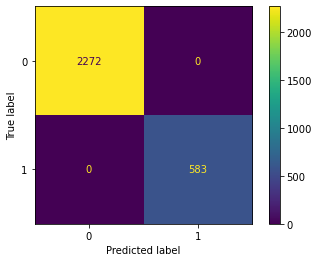

In [46]:
plot_confusion_matrix(logreg, X_train_df, y_train);

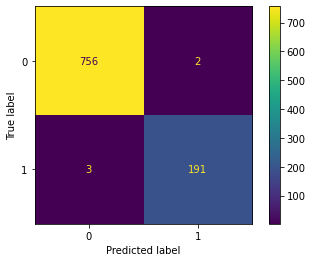

In [47]:
plot_confusion_matrix(logreg, X_val_df, y_val);

The Second Logistic Regression test is done by editing Parameters

In [48]:
logreg2 = LogisticRegression(solver='liblinear', penalty='l1', C=10)

In [49]:
# Call modeling function
logreg2 = modeling_function(logreg2, X_train_df, y_train, X_val_df, y_val)

Training accuracy:  1.0
Validation accuracy:  0.9968487394957983


/Users/qiwi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Desicion Tree Classifier

In [50]:
dt = DecisionTreeClassifier(random_state=2021)

In [51]:
dt = modeling_function(dt, X_train_df, y_train, X_val_df, y_val)

Training accuracy:  1.0
Validation accuracy:  1.0


In [52]:
dt2 = DecisionTreeClassifier(random_state=2021, max_depth=10)

In [53]:
dt2 = modeling_function(dt2, X_train_df, y_train, X_val_df, y_val)

Training accuracy:  1.0
Validation accuracy:  1.0


Random Forest Classifier

In [54]:
rf = RandomForestClassifier(random_state=2021)

In [55]:
rf = modeling_function(rf, X_train_df, y_train, X_val_df, y_val)

Training accuracy:  1.0
Validation accuracy:  0.9968487394957983


At this point, my best performing model is actually the first and second DecisionTree model. I need to transform my test data and see how this model performs on unseen data

In [56]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols)
X_test_encoded = pd.DataFrame(ohe.transform(X_test[cat_cols]), columns=ohe.get_feature_names())

In [57]:
X_test_df = pd.concat([X_test_scaled, X_test_encoded], axis=1)

In [58]:
X_test_df.shape

(1269, 4202)

In [59]:
test_preds = dt.predict(X_test_df)

In [60]:
accuracy_score(y_test, test_preds)

1.0

In [61]:
test_preds = dt2.predict(X_test_df)

In [62]:
accuracy_score(y_test, test_preds)

1.0

In [63]:
test_preds = logreg.predict(X_test_df)

In [64]:
accuracy_score(y_test, test_preds)

0.996059889676911

In [65]:
test_preds = logreg2.predict(X_test_df)

In [66]:
accuracy_score(y_test, test_preds)

0.9976359338061466

As seen, the outcomes of the decision tree model one and two are the same, with the logreg model having a great performance as well.